Configuration syst√®me optimis√©e pour Apple M2
Imports et configuration termin√©s avec succ√®s
Chargement du fichier : ncr_ride_bookings.csv
Taille : 24.4 MB
Dataset charg√© avec succ√®s: 150,000 lignes x 21 colonnes

ANALYSE EXPLORATOIRE DES DONN√âES (EDA)

1. INFORMATIONS G√âN√âRALES
   ‚Ä¢ Dimensions: 150,000 lignes x 21 colonnes
   ‚Ä¢ M√©moire utilis√©e: 111.0 MB
   ‚Ä¢ Plage temporelle: du 2024-01-01 au 2024-12-30

2. APER√áU DES DONN√âES (5 premi√®res lignes)
         Date      Time    Booking ID   Booking Status   Customer ID   Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  Cancelled Rides by Customer Reason for cancelling by Customer  Cancelled Rides by Driver Driver Cancellation Reason  Incomplete Rides Incomplete Rides Reason  Booking Value  Ride Distance  Driver Ratings  Customer Rating Payment Method
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"          eBike          Palam Vihar            Jhilmil       NaN       NaN    

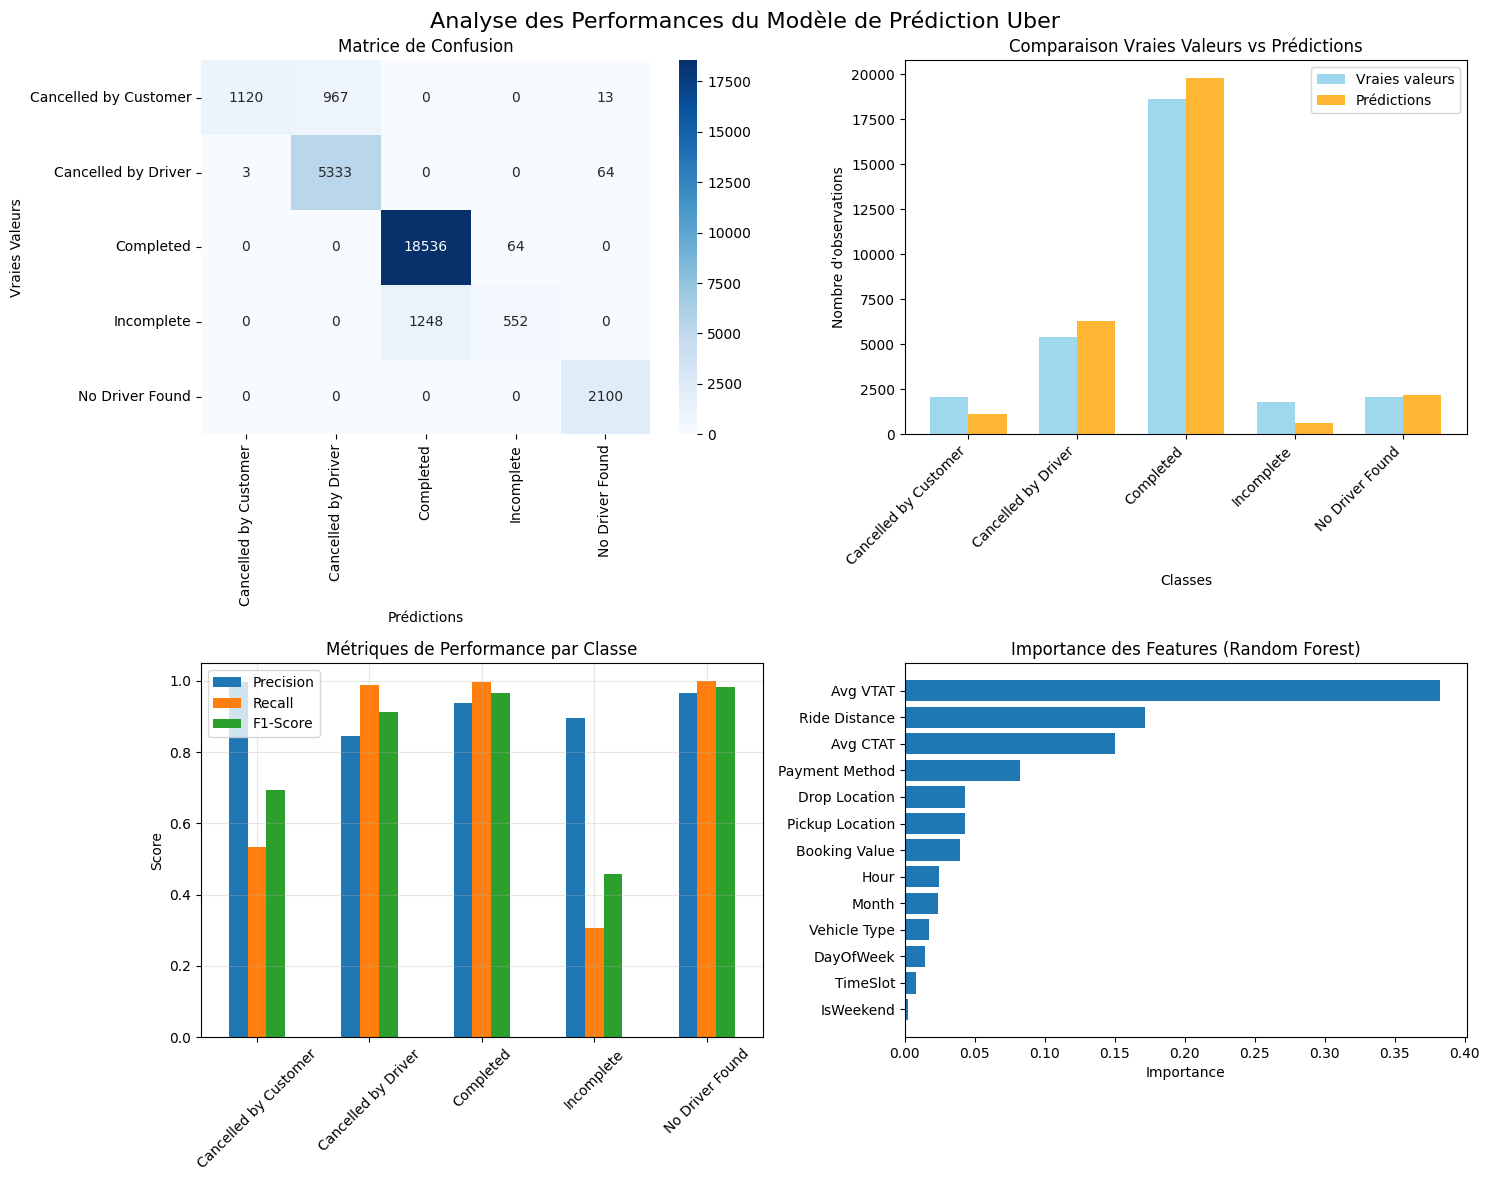

   Visualisations g√©n√©r√©es avec succ√®s

CONCLUSIONS ET RECOMMANDATIONS

1. R√âSULTATS OBTENUS
   ‚Ä¢ Mod√®le final: Random Forest
   ‚Ä¢ Accuracy: 0.9214 (92.14%)
   ‚Ä¢ Validation crois√©e: 0.9210 ¬± 0.0015
   ‚Ä¢ Niveau de performance: EXCELLENT (sans data leakage)

2. FORCES DU MOD√àLE
   ‚Ä¢ Classes bien pr√©dites:
     - Cancelled by Driver: F1-Score = 0.912
     - Completed: F1-Score = 0.966
     - No Driver Found: F1-Score = 0.982

3. POINTS D'AM√âLIORATION
   ‚Ä¢ Classes √† am√©liorer:
     - Incomplete: F1-Score = 0.457, Recall = 0.307

4. RECOMMANDATIONS TECHNIQUES
   ‚Ä¢ Feature engineering avanc√©:
     - Enrichir les donn√©es de g√©olocalisation
     - Cr√©er des features d'historique client
     - Int√©grer des donn√©es externes (m√©t√©o, trafic)
   ‚Ä¢ Mod√©lisation adapt√©e:
     - Tester XGBoost, CatBoost
     - Optimiser les seuils de d√©cision par classe

5. RECOMMANDATIONS BUSINESS
   ‚Ä¢ Monitoring: Surveiller la d√©rive des donn√©es en production
   ‚Ä¢ Seuils

In [ ]:
# ============================================================================
# PROJET DATA SCIENCE COMPLET : PR√âDICTION DES STATUTS DE R√âSERVATION UBER
# ============================================================================
# R√¥le : Titre principal du projet pour identifier clairement l'objectif
# Int√©r√™t : Documentation, tra√ßabilit√© du projet, communication de l'objectif m√©tier

# Import du module os pour interagir avec le syst√®me d'exploitation
# R√¥le : Acc√®s aux variables d'environnement pour optimiser les performances
# Int√©r√™t : Configuration des threads pour processeur Apple M2 8 c≈ìurs
import os

# Import du module warnings pour contr√¥ler les avertissements Python
# R√¥le : Suppression des messages d'alerte non critiques lors de l'ex√©cution
# Int√©r√™t : Interface utilisateur plus propre, focus sur les r√©sultats importants
import warnings

# Import de pathlib pour manipulation moderne des chemins de fichiers
# R√¥le : Gestion cross-platform des paths avec syntaxe object-oriented
# Int√©r√™t : Robustesse, m√©thodes utilitaires int√©gr√©es, √©viter les erreurs de path
from pathlib import Path

# Configuration du nombre de threads pour OpenBLAS (alg√®bre lin√©aire)
# R√¥le : Optimisation du parall√©lisme pour les op√©rations matricielles
# Int√©r√™t : Utilisation maximale des 8 c≈ìurs du processeur M2, performance accrue
os.environ['OPENBLAS_NUM_THREADS'] = '8'

# Configuration du nombre de threads pour Intel MKL (Math Kernel Library)
# R√¥le : Optimisation des calculs math√©matiques vectoris√©s
# Int√©r√™t : Acc√©l√©ration des op√©rations NumPy/SciPy sur architecture ARM64
os.environ['MKL_NUM_THREADS'] = '8'

# Configuration du nombre de threads pour OpenMP (parall√©lisation automatique)
# R√¥le : Contr√¥le du parall√©lisme des boucles automatiquement parall√©lis√©es
# Int√©r√™t : √âviter la sur-souscription, optimiser l'utilisation CPU
os.environ['OMP_NUM_THREADS'] = '8'

# D√©sactivation globale des avertissements Python
# R√¥le : Suppression des warnings non critiques de toutes les librairies
# Int√©r√™t : Sortie console claire, concentration sur les r√©sultats m√©tier
warnings.filterwarnings('ignore')

# Import de pandas pour la manipulation des donn√©es tabulaires
# R√¥le : Chargement, transformation et analyse des datasets CSV
# Int√©r√™t : Interface intuitive pour les op√©rations sur DataFrames
import pandas as pd

# Import de numpy pour les calculs num√©riques et alg√®bre lin√©aire
# R√¥le : Op√©rations math√©matiques optimis√©es sur arrays multidimensionnels
# Int√©r√™t : Performance C native, base des calculs machine learning
import numpy as np

# Import de matplotlib.pyplot pour la cr√©ation de graphiques
# R√¥le : G√©n√©ration de visualisations statiques (barres, courbes, heatmaps)
# Int√©r√™t : Communication visuelle des insights, rapport professionnel
import matplotlib.pyplot as plt

# Import de seaborn pour des visualisations statistiques avanc√©es
# R√¥le : Graphiques statistiques avec esth√©tique am√©lior√©e
# Int√©r√™t : Heatmaps, distributions, corr√©lations avec moins de code
import seaborn as sns

# Configuration du style graphique par d√©faut de matplotlib
# R√¥le : D√©finition de l'apparence visuelle standard des graphiques
# Int√©r√™t : Coh√©rence esth√©tique, lisibilit√© optimis√©e
plt.style.use('default')

# Configuration de la r√©solution des graphiques pour √©crans haute densit√©
# R√¥le : D√©finition de la qualit√© d'affichage des figures g√©n√©r√©es
# Int√©r√™t : Rendu optimal sur √©cran Retina, qualit√© professionnelle
plt.rcParams['figure.dpi'] = 100

# Configuration de la taille de police globale des graphiques
# R√¥le : Standardisation de la lisibilit√© du texte dans les visualisations
# Int√©r√™t : Adaptation aux √©crans haute r√©solution, uniformit√© visuelle
plt.rcParams['font.size'] = 10

# Import de train_test_split pour diviser les donn√©es entra√Ænement/test
# R√¥le : S√©paration reproductible des donn√©es pour validation non biais√©e
# Int√©r√™t : √âvaluation honn√™te des performances, d√©tection de l'overfitting
from sklearn.model_selection import train_test_split

# Import de cross_val_score pour la validation crois√©e
# R√¥le : Estimation robuste des performances via validation k-fold
# Int√©r√™t : R√©duction de la variance des m√©triques, fiabilit√© statistique
from sklearn.model_selection import cross_val_score

# Import de LabelEncoder pour encoder les variables cat√©gorielles
# R√¥le : Conversion des cat√©gories texte en entiers pour les algorithmes ML
# Int√©r√™t : Compatibilit√© avec les mod√®les num√©riques, efficacit√© m√©moire
from sklearn.preprocessing import LabelEncoder

# Import de StandardScaler pour normaliser les features num√©riques
# R√¥le : Centrage (moyenne=0) et r√©duction (√©cart-type=1) des variables
# Int√©r√™t : √âgalisation de l'influence des variables √† diff√©rentes √©chelles
from sklearn.preprocessing import StandardScaler

# Import de SimpleImputer pour traiter les valeurs manquantes
# R√¥le : Remplacement automatique des NaN par des strat√©gies pr√©d√©finies
# Int√©r√™t : Conservation du maximum de donn√©es, √©viter les erreurs
from sklearn.impute import SimpleImputer

# Import de RandomForestClassifier pour l'algorithme d'ensemble
# R√¥le : Mod√®le bas√© sur de multiples arbres avec vote majoritaire
# Int√©r√™t : Robustesse aux outliers, capture des interactions non-lin√©aires
from sklearn.ensemble import RandomForestClassifier

# Import de LogisticRegression pour l'algorithme de classification lin√©aire
# R√¥le : Mod√®le probabiliste lin√©aire pour classification multiclasse
# Int√©r√™t : Rapidit√©, interpr√©tabilit√©, bon mod√®le de r√©f√©rence (baseline)
from sklearn.linear_model import LogisticRegression

# Import de accuracy_score pour calculer le taux de bonnes pr√©dictions
# R√¥le : M√©trique principale = (pr√©dictions correctes / total) √ó 100
# Int√©r√™t : Compr√©hension intuitive, comparaison simple entre mod√®les
from sklearn.metrics import accuracy_score

# Import de classification_report pour un rapport d√©taill√© des performances
# R√¥le : Calcul automatique precision, recall, f1-score par classe
# Int√©r√™t : Vision compl√®te des performances, d√©tection des classes probl√©matiques
from sklearn.metrics import classification_report

# Import de confusion_matrix pour analyser les erreurs de classification
# R√¥le : Matrice croisant vraies valeurs et pr√©dictions
# Int√©r√™t : Identification des confusions sp√©cifiques entre classes
from sklearn.metrics import confusion_matrix

# Import de precision_recall_fscore_support pour m√©triques par classe
# R√¥le : Calcul d√©taill√© des m√©triques individuelles par classe
# Int√©r√™t : Analyse granulaire, optimisation cibl√©e par classe
from sklearn.metrics import precision_recall_fscore_support

# Import de Pipeline pour cha√Æner preprocessing et mod√®le
# R√¥le : Encapsulation de la s√©quence transformations ‚Üí mod√®le
# Int√©r√™t : √âvite le data leakage, reproductibilit√©, code plus propre
from sklearn.pipeline import Pipeline

# Configuration pandas pour afficher toutes les colonnes sans troncature
# R√¥le : D√©sactivation de la limitation d'affichage des colonnes nombreuses
# Int√©r√™t : Visibilit√© compl√®te des donn√©es, debug facilit√©
pd.set_option('display.max_columns', None)

# Configuration de la largeur d'affichage maximale des DataFrames
# R√¥le : Extension de l'espace horizontal pour l'affichage
# Int√©r√™t : √âviter les retours √† la ligne sur √©crans larges, lisibilit√©
pd.set_option('display.width', 1000)

# Configuration du nombre maximum de lignes affich√©es
# R√¥le : Limitation pour √©viter l'encombrement avec de gros datasets
# Int√©r√™t : Performance d'affichage, vue repr√©sentative sans surcharge
pd.set_option('display.max_rows', 100)

# Message de confirmation du chargement des configurations syst√®me
# R√¥le : Feedback utilisateur sur l'√©tat de l'initialisation
# Int√©r√™t : Validation que l'optimisation M2 est active
print("Configuration syst√®me optimis√©e pour Apple M2")

# Message de confirmation du succ√®s des imports
# R√¥le : Validation que toutes les d√©pendances sont disponibles
# Int√©r√™t : D√©tection pr√©coce des probl√®mes d'environnement
print("Imports et configuration termin√©s avec succ√®s")

# D√©finition d'une fonction de chargement s√©curis√© des donn√©es
# R√¥le : Centralisation de la logique de chargement avec gestion d'erreurs
# Int√©r√™t : R√©utilisabilit√©, robustesse, feedback d√©taill√©
def load_and_validate_data(file_path):
    # Ouverture d'un bloc try pour capturer les exceptions
    # R√¥le : Gestion gracieuse des erreurs sans crash du programme
    # Int√©r√™t : Robustesse, messages d'erreur informatifs
    try:
        # Conversion du chemin string en objet Path
        # R√¥le : Utilisation de l'API moderne pathlib pour la manipulation
        # Int√©r√™t : Compatibilit√© cross-platform, m√©thodes utilitaires
        file_path = Path(file_path)
        
        # Test d'existence du fichier avant tentative de lecture
        # R√¥le : Validation pr√©alable pour √©viter FileNotFoundError
        # Int√©r√™t : Message d'erreur explicite, √©viter tentatives inutiles
        if not file_path.exists():
            # Affichage d'un message d'erreur avec chemin sp√©cifique
            # R√¥le : Information pr√©cise sur le probl√®me rencontr√©
            # Int√©r√™t : Debug facilit√©, indication du chemin attendu
            print(f"ERREUR: Fichier non trouv√© √† l'emplacement {file_path}")
            
            # Retour de None pour signaler l'√©chec
            # R√¥le : Convention Python pour indiquer l'absence de r√©sultat valide
            # Int√©r√™t : Gestion uniforme des √©checs par le code appelant
            return None
        
        # Calcul de la taille du fichier en m√©gaoctets
        # R√¥le : Information sur la volum√©trie pour estimer le temps de chargement
        # Int√©r√™t : Validation de la taille attendue, planification ressources
        file_size_mb = file_path.stat().st_size / 1024**2
        
        # Affichage du nom du fichier en cours de traitement
        # R√¥le : Feedback utilisateur sur l'op√©ration en cours
        # Int√©r√™t : Tra√ßabilit√©, confirmation du fichier trait√©
        print(f"Chargement du fichier : {file_path.name}")
        
        # Affichage de la taille pour validation
        # R√¥le : Information sur la volum√©trie des donn√©es √† traiter
        # Int√©r√™t : D√©tection d'anomalies de taille, estimation dur√©e
        print(f"Taille : {file_size_mb:.1f} MB")
        
        # Chargement effectif du fichier CSV avec pandas
        # R√¥le : Lecture et parsing du CSV en DataFrame exploitable
        # Int√©r√™t : Structure tabulaire, optimisations automatiques pandas
        df = pd.read_csv(file_path, encoding='utf-8', low_memory=False)
        
        # Test que le DataFrame charg√© n'est pas vide
        # R√¥le : Validation de base du contenu apr√®s chargement
        # Int√©r√™t : D√©tection des fichiers corrompus ou vides
        if df.empty:
            # Message sp√©cifique pour dataset vide
            # R√¥le : Distinction des types d'erreurs pour debug
            # Int√©r√™t : Information pr√©cise sur la nature du probl√®me
            print("ERREUR: Le dataset est vide")
            
            # Retour None pour √©chec
            # R√¥le : Signal d'erreur standardis√©
            # Int√©r√™t : Gestion uniforme par le code appelant
            return None
            
        # Message de succ√®s avec dimensions du dataset
        # R√¥le : Confirmation et information sur les donn√©es charg√©es
        # Int√©r√™t : Validation visuelle, info sur la volum√©trie
        print(f"Dataset charg√© avec succ√®s: {df.shape[0]:,} lignes x {df.shape[1]} colonnes")
        
        # Retour du DataFrame valid√©
        # R√¥le : Transmission du r√©sultat au code appelant
        # Int√©r√™t : Donn√©es pr√™tes √† l'exploitation
        return df
        
    # Capture de toute exception non pr√©vue
    # R√¥le : Filet de s√©curit√© pour erreurs impr√©vues
    # Int√©r√™t : Robustesse maximale, pas de crash
    except Exception as e:
        # Affichage du d√©tail de l'exception
        # R√¥le : Information pour debug en cas de probl√®me impr√©vu
        # Int√©r√™t : Tra√ßabilit√© des erreurs, aide au debug
        print(f"ERREUR lors du chargement: {e}")
        
        # Retour None pour √©chec
        # R√¥le : Signal d'erreur uniforme
        # Int√©r√™t : Coh√©rence de gestion des erreurs
        return None

# D√©finition d'une constante pour le chemin vers les donn√©es
# R√¥le : Centralisation de la configuration du fichier source
# Int√©r√™t : Modification facile, √©viter la duplication, lisibilit√©
DATA_PATH = "/Users/nadiraliahmed/Desktop/ProjetData /uber/archive/ncr_ride_bookings.csv"

# Appel de la fonction de chargement avec le chemin configur√©
# R√¥le : Ex√©cution du chargement des donn√©es principales
# Int√©r√™t : R√©cup√©ration du DataFrame ou d√©tection d'erreur
df_raw = load_and_validate_data(DATA_PATH)

# Test de validit√© du r√©sultat de chargement
# R√¥le : V√©rification que les donn√©es ont √©t√© correctement charg√©es
# Int√©r√™t : Arr√™t pr√©coce si probl√®me critique, √©viter erreurs cascade
if df_raw is None:
    # Message d'arr√™t explicite en cas d'√©chec
    # R√¥le : Information claire sur l'impossibilit√© de continuer
    # Int√©r√™t : √âviter ex√©cution de code d√©pendant de donn√©es inexistantes
    print("ARR√äT: Impossible de continuer sans donn√©es")
    
    # Terminaison propre du programme
    # R√¥le : Arr√™t contr√¥l√© en cas d'√©chec critique
    # Int√©r√™t : √âviter les erreurs en cascade, terminaison propre
    exit()

# Affichage d'un s√©parateur visuel pour structurer la sortie
# R√¥le : D√©limitation claire entre les sections du rapport
# Int√©r√™t : Navigation facile dans les outputs, structure professionnelle
print("\n" + "="*70)

# Affichage du titre de la section d'analyse exploratoire
# R√¥le : Identification claire de la phase en cours
# Int√©r√™t : Organisation du workflow, rep√®res visuels
print("ANALYSE EXPLORATOIRE DES DONN√âES (EDA)")

# Fermeture du s√©parateur pour encadrer le titre
# R√¥le : Coh√©rence esth√©tique avec l'ouverture
# Int√©r√™t : Pr√©sentation professionnelle, d√©limitation visuelle
print("="*70)

# Affichage du sous-titre pour les informations g√©n√©rales
# R√¥le : Structure hi√©rarchique de l'analyse exploratoire
# Int√©r√™t : Organisation logique, navigation dans le rapport
print(f"\n1. INFORMATIONS G√âN√âRALES")

# Affichage des dimensions du dataset avec formatage des nombres
# R√¥le : Information de base sur la taille des donn√©es
# Int√©r√™t : √âvaluation volum√©trie, planification ressources
print(f"   ‚Ä¢ Dimensions: {df_raw.shape[0]:,} lignes x {df_raw.shape[1]} colonnes")

# Calcul de l'usage m√©moire total avec conversion en MB
# R√¥le : √âvaluation de l'empreinte m√©moire des donn√©es
# Int√©r√™t : V√©rification compatibilit√© avec ressources disponibles
memory_usage_mb = df_raw.memory_usage(deep=True).sum() / 1024**2

# Affichage de l'usage m√©moire calcul√©
# R√¥le : Information sur les ressources consomm√©es
# Int√©r√™t : Planification m√©moire, d√©tection de probl√®mes potentiels
print(f"   ‚Ä¢ M√©moire utilis√©e: {memory_usage_mb:.1f} MB")

# Affichage de la plage temporelle couverte par les donn√©es
# R√¥le : Information sur l'√©tendue temporelle du dataset
# Int√©r√™t : Validation p√©riode d'analyse, d√©tection anomalies temporelles
print(f"   ‚Ä¢ Plage temporelle: du {df_raw['Date'].min()} au {df_raw['Date'].max()}")

# Sous-titre pour l'aper√ßu des premi√®res lignes
# R√¥le : Introduction √† l'affichage des donn√©es concr√®tes
# Int√©r√™t : Structure claire, anticipation du contenu
print(f"\n2. APER√áU DES DONN√âES (5 premi√®res lignes)")

# Affichage des 5 premi√®res lignes du DataFrame
# R√¥le : Vue concr√®te de la structure et du contenu des donn√©es
# Int√©r√™t : Validation visuelle, compr√©hension du format
print(df_raw.head())

# Sous-titre pour l'analyse d√©taill√©e des variables
# R√¥le : Introduction √† l'examen syst√©matique de chaque colonne
# Int√©r√™t : Pr√©paration √† l'analyse granulaire
print(f"\n3. ANALYSE D√âTAILL√âE DES VARIABLES")

# Ligne de s√©paration pour le tableau r√©capitulatif
# R√¥le : D√©limitation visuelle du d√©but du tableau
# Int√©r√™t : Structure tabulaire claire, lisibilit√©
print("-" * 70)

# En-t√™te du tableau d'analyse avec colonnes align√©es
# R√¥le : D√©finition des colonnes d'information sur les variables
# Int√©r√™t : Compr√©hension imm√©diate du contenu tabulaire
print(f"{'Variable':<25} {'Type':<12} {'Uniques':<8} {'Manquant':<8} {'% Manquant':<12}")

# Seconde ligne de s√©paration sous l'en-t√™te
# R√¥le : D√©limitation entre en-t√™te et contenu
# Int√©r√™t : Convention tabulaire, am√©lioration lisibilit√©
print("-" * 70)

# Boucle d'analyse syst√©matique de chaque colonne du dataset
# R√¥le : Traitement exhaustif de toutes les variables
# Int√©r√™t : Vue compl√®te, d√©tection des probl√®mes de qualit√©
for col in df_raw.columns:
    # Calcul du nombre de valeurs uniques dans la colonne
    # R√¥le : Mesure de la diversit√©/cardinalit√© de la variable
    # Int√©r√™t : D√©tection variables cat√©gorielles, √©valuation complexit√©
    unique_count = df_raw[col].nunique()
    
    # Comptage des valeurs manquantes (NaN)
    # R√¥le : Quantification des donn√©es manquantes
    # Int√©r√™t : √âvaluation qualit√©, planification strat√©gie imputation
    missing_count = df_raw[col].isnull().sum()
    
    # Calcul du pourcentage de valeurs manquantes
    # R√¥le : Normalisation pour comparaison entre variables
    # Int√©r√™t : √âvaluation relative de la compl√©tude
    missing_percent = (missing_count / len(df_raw)) * 100
    
    # R√©cup√©ration du type de donn√©es pandas
    # R√¥le : Identification du type de la variable
    # Int√©r√™t : Planification des transformations n√©cessaires
    data_type = str(df_raw[col].dtype)
    
    # Affichage format√© de toutes les statistiques calcul√©es
    # R√¥le : Pr√©sentation structur√©e des informations de la variable
    # Int√©r√™t : Vue d'ensemble, comparaison facile entre variables
    print(f"{col:<25} {data_type:<12} {unique_count:<8} {missing_count:<8} {missing_percent:<12.1f}%")

# D√©finition de la variable cible bas√©e sur la connaissance m√©tier
# R√¥le : S√©lection de la variable √† pr√©dire selon l'objectif business
# Int√©r√™t : Orientation claire du probl√®me de machine learning
TARGET_COLUMN = "Booking Status"

# Affichage de la variable cible s√©lectionn√©e
# R√¥le : Confirmation explicite du choix de target
# Int√©r√™t : Tra√ßabilit√© de la d√©cision, validation
print(f"\n5. VARIABLE CIBLE S√âLECTIONN√âE: '{TARGET_COLUMN}'")

# Test de pr√©sence de la variable cible dans le dataset
# R√¥le : Validation de coh√©rence entre s√©lection et donn√©es
# Int√©r√™t : √âviter erreurs d'ex√©cution, v√©rification pr√©alable
if TARGET_COLUMN in df_raw.columns:
    # Calcul de la distribution des classes de la cible
    # R√¥le : Analyse de la r√©partition des valeurs √† pr√©dire
    # Int√©r√™t : D√©tection d√©s√©quilibres, planification strat√©gie
    target_distribution = df_raw[TARGET_COLUMN].value_counts()
    
    # Sous-titre pour la distribution des classes
    # R√¥le : Structure de l'affichage des statistiques de cible
    # Int√©r√™t : Clart√© dans la pr√©sentation
    print(f"\nDistribution des classes:")
    
    # Boucle d'affichage de chaque classe avec effectifs et pourcentages
    # R√¥le : Pr√©sentation d√©taill√©e de la r√©partition
    # Int√©r√™t : √âvaluation quantitative de l'√©quilibre
    for class_name, count in target_distribution.items():
        # Calcul du pourcentage pour chaque classe
        # R√¥le : Normalisation pour faciliter l'interpr√©tation
        # Int√©r√™t : Comparaison relative ind√©pendante de la taille
        percentage = (count / len(df_raw)) * 100
        
        # Affichage format√© nom, effectif et pourcentage
        # R√¥le : Information compl√®te sur chaque classe
        # Int√©r√™t : √âvaluation de l'importance relative
        print(f"   ‚Ä¢ {class_name}: {count:,} ({percentage:.1f}%)")
    
    # Calcul du pourcentage de la classe majoritaire
    # R√¥le : Identification du niveau de d√©s√©quilibre
    # Int√©r√™t : D√©cision sur techniques de r√©√©quilibrage
    max_class_pct = (target_distribution.iloc[0] / len(df_raw)) * 100
    
    # Test de d√©tection d'un d√©s√©quilibre significatif
    # R√¥le : Application d'une r√®gle m√©tier (seuil 60%)
    # Int√©r√™t : Anticipation des probl√®mes de mod√©lisation
    if max_class_pct > 60:
        # Avertissement de d√©s√©quilibre avec pourcentage
        # R√¥le : Alerte sur probl√®me potentiel de mod√©lisation
        # Int√©r√™t : Pr√©paration aux techniques de compensation
        print(f"   ‚ö† D√âS√âQUILIBRE D√âTECT√â: Classe majoritaire = {max_class_pct:.1f}%")
        
        # Suggestion de solution technique
        # R√¥le : Recommandation bas√©e sur bonnes pratiques ML
        # Int√©r√™t : Guidance automatique vers techniques appropri√©es
        print(f"     ‚Üí Utilisation recommand√©e de 'class_weight=balanced'")

# S√©parateur pour la section de nettoyage et preprocessing
# R√¥le : Transition visuelle entre EDA et preprocessing
# Int√©r√™t : Structure claire du workflow
print("\n" + "="*70)

# Titre de la section de nettoyage des donn√©es
# R√¥le : Identification de la phase de preprocessing
# Int√©r√™t : Suivi de progression, organisation logique
print("NETTOYAGE ET PR√âPROCESSING")

# Fermeture du s√©parateur de titre
# R√¥le : Coh√©rence esth√©tique avec l'ouverture
# Int√©r√™t : Professionnalisme visuel
print("="*70)

# Cr√©ation d'une copie du DataFrame original
# R√¥le : Pr√©servation des donn√©es brutes pour r√©f√©rence
# Int√©r√™t : Possibilit√© de rollback, comparaisons, audit
df_clean = df_raw.copy()

# Sauvegarde des dimensions initiales pour suivi
# R√¥le : M√©morisation de l'√©tat avant transformation
# Int√©r√™t : Quantification de l'impact des op√©rations
initial_shape = df_clean.shape

# Sous-titre de la section de nettoyage
# R√¥le : Structure des op√©rations de nettoyage
# Int√©r√™t : Suivi √©tape par √©tape des transformations
print(f"\n1. NETTOYAGE DES DONN√âES")

# Affichage de l'√©tat initial pour r√©f√©rence
# R√¥le : Point de d√©part avant transformations
# Int√©r√™t : Base de comparaison pour mesurer l'impact
print(f"   ‚Ä¢ Dataset initial: {initial_shape[0]:,} lignes")

# Suppression des lignes o√π la variable cible est manquante
# R√¥le : √âlimination des observations sans √©tiquette
# Int√©r√™t : Impossible d'entra√Æner un mod√®le supervis√© sans target
df_clean = df_clean.dropna(subset=[TARGET_COLUMN])

# Affichage du nouvel √©tat apr√®s suppression
# R√¥le : Information post-transformation
# Int√©r√™t : √âvaluation de l'impact sur la taille
print(f"   ‚Ä¢ Apr√®s suppression cible manquante: {df_clean.shape[0]:,} lignes")

# Calcul du nombre de lignes supprim√©es
# R√¥le : Quantification de la perte de donn√©es
# Int√©r√™t : √âvaluation de l'impact sur la repr√©sentativit√©
lines_dropped = initial_shape[0] - df_clean.shape[0]

# Affichage du nombre de lignes perdues
# R√¥le : Information sur l'ampleur de la perte
# Int√©r√™t : Validation de l'acceptabilit√© de la perte
print(f"   ‚Ä¢ Lignes supprim√©es: {lines_dropped:,}")

# D√©finition du seuil de tol√©rance pour les colonnes incompl√®tes
# R√¥le : Param√®trage de la r√®gle d'√©limination des variables
# Int√©r√™t : Crit√®re objectif, ajustable selon le contexte
high_missing_threshold = 0.8

# Initialisation de la liste des colonnes √† supprimer
# R√¥le : Collection des variables candidates √† l'√©limination
# Int√©r√™t : Tra√ßabilit√© des d√©cisions, validation ult√©rieure
columns_to_drop = []

# Sous-titre pour l'identification des colonnes probl√©matiques
# R√¥le : Information sur les crit√®res appliqu√©s
# Int√©r√™t : Transparence du processus de s√©lection
print(f"\n2. IDENTIFICATION DES COLONNES INUTILISABLES (>{high_missing_threshold*100}% manquant)")

# Boucle d'√©valuation de chaque colonne selon le crit√®re de qualit√©
# R√¥le : Application syst√©matique du seuil de tol√©rance
# Int√©r√™t : D√©cision objective bas√©e sur la qualit√©
for col in df_clean.columns:
    # Exclusion de la variable cible du processus de suppression
    # R√¥le : Protection de la variable essentielle √† la pr√©diction
    # Int√©r√™t : √âviter suppression accidentelle de la target
    if col != TARGET_COLUMN:
        # Calcul du taux de valeurs manquantes
        # R√¥le : √âvaluation de la compl√©tude de la variable
        # Int√©r√™t : Application du crit√®re de seuil
        missing_pct = df_clean[col].isnull().sum() / len(df_clean)
        
        # Test de d√©passement du seuil de tol√©rance
        # R√¥le : Application de la r√®gle de suppression
        # Int√©r√™t : √âlimination automatique des variables de mauvaise qualit√©
        if missing_pct > high_missing_threshold:
            # Ajout √† la liste de suppression
            # R√¥le : Enregistrement de la d√©cision
            # Int√©r√™t : Tra√ßabilit√© pour validation
            columns_to_drop.append(col)
            
            # Affichage de la d√©cision avec justification
            # R√¥le : Information transparente sur les suppressions
            # Int√©r√™t : Audit des transformations, r√©vision possible
            print(f"   ‚Ä¢ {col}: {missing_pct*100:.1f}% manquant ‚Üí SUPPRESSION")

# Suppression effective des colonnes identifi√©es
# R√¥le : Application des d√©cisions de suppression
# Int√©r√™t : R√©duction de dimensionalit√©, am√©lioration qualit√©
df_clean = df_clean.drop(columns=columns_to_drop)

# Calcul du nombre de colonnes restantes
# R√¥le : Quantification du r√©sultat de l'op√©ration
# Int√©r√™t : √âvaluation de la r√©duction de dimensionalit√©
remaining_cols = df_clean.shape[1]

# Calcul du nombre de colonnes supprim√©es
# R√¥le : Quantification de l'impact de la suppression
# Int√©r√™t : Validation de l'ampleur de la r√©duction
dropped_cols = len(columns_to_drop)

# Affichage du bilan de l'op√©ration
# R√¥le : Information sur l'impact de la suppression
# Int√©r√™t : √âvaluation de la structure r√©sultante
print(f"   ‚Ä¢ Colonnes restantes: {remaining_cols} (supprim√©es: {dropped_cols})")

# Sous-titre pour la section de feature engineering
# R√¥le : Introduction √† la pr√©paration des variables
# Int√©r√™t : Structure logique, anticipation des transformations
print(f"\n3. FEATURE ENGINEERING")

# S√©paration de la variable cible des variables explicatives
# R√¥le : Isolation de la target selon convention ML
# Int√©r√™t : Pr√©paration format d'entr√©e algorithmes supervis√©s
X = df_clean.drop(columns=[TARGET_COLUMN])

# Copie de la variable cible dans une s√©rie d√©di√©e
# R√¥le : Extraction de la target dans structure s√©par√©e
# Int√©r√™t : Manipulation ind√©pendante, √©viter modifications accidentelles
y = df_clean[TARGET_COLUMN].copy()

# Affichage du nombre de features disponibles
# R√¥le : Information sur l'espace des variables explicatives
# Int√©r√™t : √âvaluation de la dimensionalit√© du probl√®me
print(f"   ‚Ä¢ Features disponibles: {X.shape[1]}")

# Affichage du nombre d'observations
# R√¥le : Confirmation de la taille de l'√©chantillon
# Int√©r√™t : √âvaluation de la repr√©sentativit√© statistique
print(f"   ‚Ä¢ Observations: {X.shape[0]:,}")

# D√©finition de la liste des features l√©gitimes selon expertise m√©tier
# R√¥le : S√©lection bas√©e sur la connaissance business du domaine
# Int√©r√™t : √âviter data leakage, variables disponibles √† la r√©servation
LEGITIMATE_FEATURES = [
    'Date',               # Date de r√©servation
    'Time',               # Heure de r√©servation  
    'Pickup Location',    # Lieu de d√©part choisi
    'Drop Location',      # Lieu d'arriv√©e choisi
    'Ride Distance',      # Distance estim√©e du trajet
    'Booking Value',      # Valeur estim√©e de la course
    'Vehicle Type',       # Type de v√©hicule choisi
    'Payment Method',     # Mode de paiement s√©lectionn√©
    'Avg VTAT',          # Temps d'attente v√©hicule historique
    'Avg CTAT'           # Temps d'attente client historique
]

# Affichage de confirmation de la s√©lection de features
# R√¥le : Information sur les variables retenues
# Int√©r√™t : Tra√ßabilit√© de la s√©lection m√©tier
print(f"\n   ‚úÖ FEATURES L√âGITIMES S√âLECTIONN√âES")

# Affichage du nombre de features dans la liste
# R√¥le : Information sur la taille de la s√©lection
# Int√©r√™t : √âvaluation de la richesse des variables disponibles
print(f"   Variables d√©finies par l'utilisateur: {len(LEGITIMATE_FEATURES)}")

# Initialisation de la liste des features effectivement disponibles
# R√¥le : Collection des variables pr√©sentes dans le dataset
# Int√©r√™t : Adaptation entre s√©lection th√©orique et r√©alit√©
available_features = []

# Boucle de v√©rification de disponibilit√© de chaque feature
# R√¥le : Test de pr√©sence de chaque variable s√©lectionn√©e
# Int√©r√™t : √âviter erreurs, utiliser seulement variables existantes
for feat in LEGITIMATE_FEATURES:
    # Test de pr√©sence dans le dataset
    # R√¥le : V√©rification existence de la variable
    # Int√©r√™t : √âviter KeyError lors de l'extraction
    if feat in X.columns:
        # Ajout √† la liste des disponibles
        # R√¥le : Collection des variables utilisables
        # Int√©r√™t : Construction de la liste finale
        available_features.append(feat)
        
        # Affichage de confirmation de disponibilit√©
        # R√¥le : Information positive sur la variable
        # Int√©r√™t : Validation visuelle, tra√ßabilit√©
        print(f"     + {feat}: DISPONIBLE")
    else:
        # Affichage d'information sur indisponibilit√©
        # R√¥le : Information sur l'√©cart entre th√©orie et r√©alit√©
        # Int√©r√™t : Debug, adaptation de la s√©lection
        print(f"     - {feat}: NON DISPONIBLE dans le dataset")

# Message de validation de l'expertise utilisateur
# R√¥le : Confirmation de la confiance dans la s√©lection
# Int√©r√™t : Validation de l'approche m√©tier
print(f"   ‚úÖ Features valid√©es par l'expertise utilisateur")

# Extraction du sous-ensemble de donn√©es avec features s√©lectionn√©es
# R√¥le : Cr√©ation du dataset final pour mod√©lisation
# Int√©r√™t : Focus sur variables pertinentes, r√©duction bruit
X_selected = X[available_features].copy()

# Affichage des dimensions du dataset final
# R√¥le : Information sur la taille du dataset de travail
# Int√©r√™t : Validation coh√©rence s√©lection/r√©sultat
print(f"   ‚Ä¢ Shape finale: {X_selected.shape}")

# Test de pr√©sence des variables temporelles pour feature engineering
# R√¥le : Condition pr√©alable aux transformations temporelles
# Int√©r√™t : √âviter erreurs, maximiser valeur des donn√©es temporelles
if 'Date' in X_selected.columns and 'Time' in X_selected.columns:
    # Information sur le d√©but du feature engineering temporel
    # R√¥le : Communication de l'op√©ration en cours
    # Int√©r√™t : Suivi des transformations, feedback utilisateur
    print(f"\n   üïí FEATURE ENGINEERING TEMPOREL")
    
    # Bloc try pour gestion des erreurs de parsing temporel
    # R√¥le : Robustesse face aux formats de date/heure inattendus
    # Int√©r√™t : Continuit√© du processus m√™me avec donn√©es probl√©matiques
    try:
        # Cr√©ation d'une colonne datetime compl√®te par concat√©nation
        # R√¥le : Combinaison Date + Time pour extraction features temporelles
        # Int√©r√™t : Exploitation maximale de l'information temporelle
        X_selected['DateTime'] = pd.to_datetime(X_selected['Date'] + ' ' + X_selected['Time'])
        
        # Extraction de l'heure (0-23) de la r√©servation
        # R√¥le : Capturer patterns horaires (rush, nuit, etc.)
        # Int√©r√™t : Heures de pointe influencent fortement succ√®s/√©checs
        X_selected['Hour'] = X_selected['DateTime'].dt.hour
        
        # Extraction du jour de la semaine (0=lundi, 6=dimanche)
        # R√¥le : Capturer patterns hebdomadaires (weekend vs semaine)
        # Int√©r√™t : Comportements diff√©rents selon jours
        X_selected['DayOfWeek'] = X_selected['DateTime'].dt.dayofweek
        
        # Extraction du mois (1-12)
        # R√¥le : Capturer saisonnalit√© (vacances, m√©t√©o, etc.)
        # Int√©r√™t : Variations mensuelles dans comportements transport
        X_selected['Month'] = X_selected['DateTime'].dt.month
        
        # Cr√©ation d'une variable binaire weekend/semaine
        # R√¥le : Simplification binaire du pattern hebdomadaire
        # Int√©r√™t : Distinction majeure dans comportements transport
        X_selected['IsWeekend'] = (X_selected['DayOfWeek'] >= 5).astype(int)
        
        # D√©finition d'une fonction de cr√©neaux horaires m√©tier
        # R√¥le : Regroupement des heures selon logique transport
        # Int√©r√™t : Capturer patterns de trafic urbain
        def get_time_slot(hour):
            # Test pour cr√©neaux du matin rush (6h-10h)
            # R√¥le : Identification des heures de pointe matinales
            # Int√©r√™t : Pattern de trafic dense vers les centres d'affaires
            if 6 <= hour < 10:
                return 'Morning_Rush'
            # Test pour cr√©neaux de milieu de journ√©e (10h-16h)
            # R√¥le : Identification des heures creuses
            # Int√©r√™t : Pattern de trafic plus fluide, disponibilit√© v√©hicules
            elif 10 <= hour < 16:
                return 'Midday'  
            # Test pour cr√©neaux du soir rush (16h-20h)
            # R√¥le : Identification des heures de pointe du soir
            # Int√©r√™t : Pattern de trafic dense de retour domicile
            elif 16 <= hour < 20:
                return 'Evening_Rush'
            # Test pour cr√©neaux de soir√©e (20h-24h)
            # R√¥le : Identification des heures de sorties/loisirs
            # Int√©r√™t : Pattern de demande loisirs, restaurants, bars
            elif 20 <= hour < 24:
                return 'Evening'
            # Cr√©neaux de nuit et petit matin par d√©faut
            # R√¥le : Regroupement des heures √† faible activit√©
            # Int√©r√™t : Pattern de faible demande, peu de v√©hicules
            else:
                return 'Night_EarlyMorning'
        
        # Application de la fonction de cr√©neaux √† la colonne Hour
        # R√¥le : Transformation heures num√©riques en cr√©neaux m√©tier
        # Int√©r√™t : Features plus interpr√©tables et potentiellement pr√©dictives
        X_selected['TimeSlot'] = X_selected['Hour'].apply(get_time_slot)
        
        # Suppression des colonnes temporelles brutes devenues redondantes
        # R√¥le : Nettoyage des variables transform√©es pour √©viter redondance
        # Int√©r√™t : Simplification mod√®le, √©viter corr√©lation variables
        X_selected = X_selected.drop(columns=['Date', 'Time', 'DateTime'])
        
        # Message de confirmation des features cr√©√©es
        # R√¥le : Information sur le succ√®s du feature engineering
        # Int√©r√™t : Validation des transformations, tra√ßabilit√©
        print(f"   ‚úÖ Features temporelles cr√©√©es: Hour, DayOfWeek, Month, IsWeekend, TimeSlot")
        
    # Capture des erreurs de parsing temporel
    # R√¥le : Gestion des formats de date/heure probl√©matiques
    # Int√©r√™t : Robustesse, continuit√© m√™me avec donn√©es d√©faillantes
    except Exception as e:
        # Affichage de l'erreur rencontr√©e
        # R√¥le : Information sur le probl√®me de parsing
        # Int√©r√™t : Debug, compr√©hension des limitations
        print(f"   ‚ö†Ô∏è Erreur feature engineering temporel: {e}")

# Mise √† jour de la liste des features apr√®s transformations
# R√¥le : Actualisation de l'inventaire apr√®s feature engineering
# Int√©r√™t : Coh√©rence entre liste et contenu r√©el du dataset
available_features = X_selected.columns.tolist()

# Initialisation de l'encodeur pour la variable cible
# R√¥le : Pr√©paration de la transformation cat√©gories ‚Üí entiers
# Int√©r√™t : Compatibilit√© avec algorithmes ML num√©riques
label_encoder = LabelEncoder()

# Application de l'encodage √† la variable cible
# R√¥le : Conversion des cat√©gories texte en labels num√©riques
# Int√©r√™t : Format requis par algorithmes de classification
y_encoded = label_encoder.fit_transform(y)

# Sous-titre pour la section d'encodage de la cible
# R√¥le : Structure de l'information sur transformation cible
# Int√©r√™t : Suivi des √©tapes de preprocessing
print(f"\n4. ENCODAGE DE LA VARIABLE CIBLE")

# Affichage du nombre de classes d√©tect√©es
# R√¥le : Information sur la cardinalit√© du probl√®me
# Int√©r√™t : √âvaluation de la complexit√© multiclasse
print(f"   ‚Ä¢ Classes d√©tect√©es: {len(label_encoder.classes_)}")

# Boucle d'affichage du mapping cat√©gories ‚Üí entiers
# R√¥le : Transparence de l'encodage appliqu√©
# Int√©r√™t : Possibilit√© de d√©codage, compr√©hension pr√©dictions
for i, class_name in enumerate(label_encoder.classes_):
    # Comptage des exemples pour chaque classe encod√©e
    # R√¥le : V√©rification conservation des effectifs
    # Int√©r√™t : Validation encodage, d√©tection anomalies
    count = np.sum(y_encoded == i)
    
    # Affichage du mapping avec effectifs
    # R√¥le : Information compl√®te sur chaque classe
    # Int√©r√™t : Validation crois√©e encodage/distributions
    print(f"     {i}: {class_name} ({count:,} exemples)")

# Identification des features cat√©gorielles par type pandas
# R√¥le : Classification des variables pour traitement appropri√©
# Int√©r√™t : Pr√©paration encodage sp√©cifique par type
categorical_features = X_selected.select_dtypes(include=['object']).columns.tolist()

# Identification des features num√©riques par type pandas
# R√¥le : Isolation des variables d√©j√† exploitables num√©riquement
# Int√©r√™t : √âviter transformations inutiles, optimiser traitements
numerical_features = X_selected.select_dtypes(include=[np.number]).columns.tolist()

# Sous-titre pour la section de traitement des features
# R√¥le : Structure information sur transformations variables
# Int√©r√™t : Anticipation des op√©rations, organisation logique
print(f"\n5. TRAITEMENT DES FEATURES")

# Affichage du nombre de features cat√©gorielles
# R√¥le : Information sur l'ampleur du travail d'encodage
# Int√©r√™t : Planification ressources, estimation temps traitement
print(f"   ‚Ä¢ Features cat√©gorielles: {len(categorical_features)}")

# Affichage du nombre de features num√©riques
# R√¥le : Information sur variables pr√™tes √† l'emploi
# Int√©r√™t : √âvaluation proportion donn√©es d√©j√† exploitables
print(f"   ‚Ä¢ Features num√©riques: {len(numerical_features)}")

# Cr√©ation d'une copie pour appliquer les transformations
# R√¥le : Pr√©servation des donn√©es s√©lectionn√©es avant transformation
# Int√©r√™t : Possibilit√© rollback, comparaisons avant/apr√®s
X_processed = X_selected.copy()

# Boucle de traitement de chaque feature cat√©gorielle
# R√¥le : Application syst√©matique de l'encodage aux variables textuelles
# Int√©r√™t : Uniformisation format, compatibilit√© algorithmes ML
for feature in categorical_features:
    # Remplacement des valeurs manquantes par marqueur explicite
    # R√¥le : Gestion des NaN pour √©viter erreurs d'encodage
    # Int√©r√™t : Conservation information "donn√©e manquante"
    X_processed[feature] = X_processed[feature].fillna('MISSING')
    
    # Conversion explicite en cha√Ænes de caract√®res
    # R√¥le : Homog√©n√©isation du type pour l'encodage
    # Int√©r√™t : √âviter erreurs de type, robustesse processus
    X_processed[feature] = X_processed[feature].astype(str)
    
    # Initialisation d'un encodeur sp√©cifique √† cette feature
    # R√¥le : Cr√©ation mapping unique pour chaque variable
    # Int√©r√™t : Pr√©servation ind√©pendance des encodages
    feature_encoder = LabelEncoder()
    
    # Application de l'encodage num√©rique √† la feature
    # R√¥le : Transformation cat√©gories ‚Üí entiers pour cette variable
    # Int√©r√™t : Format num√©rique exploitable par algorithmes ML
    X_processed[feature] = feature_encoder.fit_transform(X_processed[feature])
    
    # Calcul du nombre de cat√©gories originales pour validation
    # R√¥le : V√©rification coh√©rence entre original et encod√©
    # Int√©r√™t : Validation processus, d√©tection anomalies cardinalit√©
    original_categories = X_selected[feature].nunique()
    
    # Affichage du bilan de l'encodage pour cette feature
    # R√¥le : Information sur le nombre de cat√©gories trait√©es
    # Int√©r√™t : Validation processus, d√©tection probl√®mes cardinalit√©
    print(f"     ‚Ä¢ {feature}: {original_categories} cat√©gories encod√©es")

# Affichage des dimensions finales apr√®s preprocessing complet
# R√¥le : Confirmation √©tat final des donn√©es pour mod√©lisation
# Int√©r√™t : Validation conservation dimensions, pr√™t pour ML
print(f"   ‚Ä¢ Dataset final pr√©process√©: {X_processed.shape}")

# S√©parateur pour la section de division des donn√©es
# R√¥le : D√©limitation visuelle entre preprocessing et validation
# Int√©r√™t : Structure claire du workflow
print("\n" + "="*70)

# Titre de la section de division train/test
# R√¥le : Identification de la phase de pr√©paration validation
# Int√©r√™t : Suivi progression, √©tape cl√© m√©thodologie ML
print("DIVISION TRAIN/TEST")

# Fermeture du s√©parateur de titre
# R√¥le : Coh√©rence esth√©tique avec ouverture
# Int√©r√™t : Professionnalisme visuel
print("="*70)

# Bloc try pour tentative de division stratifi√©e
# R√¥le : Essai de division avec maintien proportions classes
# Int√©r√™t : Robustesse avec fallback si stratification impossible
try:
    # Test de faisabilit√© de la stratification
    # R√¥le : V√©rification conditions pour stratification (min 2 par classe)
    # Int√©r√™t : √âviter erreurs, adaptation aux donn√©es disponibles
    stratify_param = y_encoded if len(set(y_encoded)) > 1 and min(np.bincount(y_encoded)) >= 2 else None
    
    # Division stratifi√©e des donn√©es
    # R√¥le : S√©paration train/test avec pr√©servation proportions classes
    # Int√©r√™t : √âvaluation non biais√©e, repr√©sentativit√© des distributions
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed,         # Features preprocess√©es
        y_encoded,          # Variable cible encod√©e
        test_size=0.2,      # 20% pour test (standard ML)
        random_state=42,    # Reproductibilit√© des r√©sultats
        stratify=stratify_param  # Maintien proportions si possible
    )
    
    # Message de confirmation succ√®s stratification
    # R√¥le : Information sur m√©thode division effectivement utilis√©e
    # Int√©r√™t : Tra√ßabilit√© qualit√© de la division
    print(f"   ‚Ä¢ Division stratifi√©e r√©ussie")
    
# Capture exception en cas √©chec stratification
# R√¥le : Gestion cas o√π stratification impossible (classes trop rares)
# Int√©r√™t : Continuit√© processus m√™me avec donn√©es d√©s√©quilibr√©es
except Exception as e:
    # Affichage de l'erreur rencontr√©e
    # R√¥le : Information sur cause √©chec stratification
    # Int√©r√™t : Debug facilit√©, compr√©hension limitations
    print(f"   ‚Ä¢ Stratification impossible: {e}")
    
    # Division simple sans contrainte stratification
    # R√¥le : S√©paration basique en fallback
    # Int√©r√™t : Garantie fonctionnement m√™me cas difficiles
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_encoded, test_size=0.2, random_state=42
    )

# Affichage taille du set d'entra√Ænement
# R√¥le : Information volum√©trie donn√©es d'apprentissage
# Int√©r√™t : √âvaluation repr√©sentativit√© statistique
print(f"   ‚Ä¢ Set d'entra√Ænement: {X_train.shape[0]:,} exemples")

# Affichage taille du set de test
# R√¥le : Information volum√©trie donn√©es d'√©valuation
# Int√©r√™t : √âvaluation robustesse de la validation
print(f"   ‚Ä¢ Set de test: {X_test.shape[0]:,} exemples")

# Sous-titre pour analyse distribution post-division
# R√¥le : Introduction v√©rification qualit√© division
# Int√©r√™t : Validation coh√©rence proportions classes
print(f"\n   Distribution des classes:")

# En-t√™te du tableau de distribution
# R√¥le : Structure tabulaire pour pr√©sentation effectifs
# Int√©r√™t : Lisibilit√© am√©lior√©e, comparaison facile
print(f"   {'Classe':<20} {'Train':<8} {'Test':<8} {'Total':<8}")

# Ligne de s√©paration du tableau
# R√¥le : D√©limitation visuelle entre en-t√™te et contenu
# Int√©r√™t : Convention tabulaire, am√©lioration lisibilit√©
print(f"   {'-'*20} {'-'*8} {'-'*8} {'-'*8}")

# Boucle d'analyse distribution de chaque classe
# R√¥le : V√©rification coh√©rence proportions post-division
# Int√©r√™t : Validation qualit√© stratification ou d√©tection biais
for i, class_name in enumerate(label_encoder.classes_):
    # Comptage exemples de cette classe dans train
    # R√¥le : Quantification repr√©sentation en entra√Ænement
    # Int√©r√™t : √âvaluation √©quilibre pour l'apprentissage
    train_count = np.sum(y_train == i)
    
    # Comptage exemples de cette classe dans test
    # R√¥le : Quantification repr√©sentation en test
    # Int√©r√™t : √âvaluation robustesse de l'√©valuation
    test_count = np.sum(y_test == i)
    
    # Calcul du total pour v√©rification
    # R√¥le : Validation conservation des effectifs
    # Int√©r√™t : D√©tection erreurs de division
    total_count = train_count + test_count
    
    # Affichage format√© des effectifs par classe
    # R√¥le : Pr√©sentation structur√©e r√©sultats distribution
    # Int√©r√™t : Validation visuelle √©quilibre donn√©es
    print(f"   {class_name:<20} {train_count:<8} {test_count:<8} {total_count:<8}")

# S√©parateur pour section mod√©lisation
# R√¥le : Transition visuelle vers phase entra√Ænement
# Int√©r√™t : Structure claire workflow, anticipation mod√©lisation
print("\n" + "="*70)

# Titre section s√©lection et entra√Ænement mod√®le
# R√¥le : Identification phase centrale m√©thodologie ML
# Int√©r√™t : Suivi progression, √©tape cl√© du projet
print("S√âLECTION ET ENTRA√éNEMENT DU MOD√àLE")

# Fermeture s√©parateur titre
# R√¥le : Coh√©rence esth√©tique avec structure g√©n√©rale
# Int√©r√™t : Professionnalisme visuel
print("="*70)

# D√©finition fonction cr√©ation pipeline preprocessing
# R√¥le : Centralisation logique preprocessing pour r√©utilisabilit√©
# Int√©r√™t : √âviter data leakage, coh√©rence transformations, code propre
def create_preprocessing_pipeline():
    # Retour pipeline avec √©tapes preprocessing standard
    # R√¥le : Encapsulation transformations en s√©quence reproductible
    # Int√©r√™t : √âviter data leakage, reproductibilit√©, maintenabilit√©
    return Pipeline([
        # √âtape imputation des valeurs manquantes par m√©diane
        # R√¥le : Remplacement NaN par valeur robuste aux outliers
        # Int√©r√™t : Conservation donn√©es, robustesse aux valeurs extr√™mes
        ('imputer', SimpleImputer(strategy='median')),
        
        # √âtape standardisation des features (centrage et r√©duction)
        # R√¥le : Normalisation moyenne=0, √©cart-type=1
        # Int√©r√™t : √âgalisation influence variables, am√©lioration convergence
        ('scaler', StandardScaler())
    ])

# D√©finition fonction √©valuation compl√®te des mod√®les
# R√¥le : Standardisation √©valuation et comparaison algorithmes
# Int√©r√™t : Coh√©rence m√©thodologique, r√©duction duplication code
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    # Affichage nom du mod√®le en cours d'√©valuation
    # R√¥le : Information sur √©tape en cours de traitement
    # Int√©r√™t : Suivi progression, identification mod√®le √©valu√©
    print(f"\n--- √âVALUATION : {model_name} ---")
    
    # Message information d√©but entra√Ænement
    # R√¥le : Feedback utilisateur sur op√©ration en cours
    # Int√©r√™t : Suivi temps r√©el, patience pour op√©rations longues
    print(f"Entra√Ænement en cours...")
    
    # Entra√Ænement effectif du mod√®le sur donn√©es train
    # R√¥le : Apprentissage param√®tres du mod√®le sur √©chantillon
    # Int√©r√™t : Optimisation param√®tres pour minimiser erreur
    model.fit(X_train, y_train)
    
    # G√©n√©ration pr√©dictions sur ensemble de test
    # R√¥le : Application mod√®le entra√Æn√© sur donn√©es non vues
    # Int√©r√™t : Estimation non biais√©e performances en production
    y_pred = model.predict(X_test)
    
    # Calcul de l'accuracy (taux bonnes classifications)
    # R√¥le : M√©trique principale performance en classification
    # Int√©r√™t : Indicateur simple et intuitif qualit√© mod√®le
    accuracy = accuracy_score(y_test, y_pred)
    
    # Validation crois√©e pour estimation robuste performances
    # R√¥le : √âvaluation sur plusieurs plis pour r√©duire variance
    # Int√©r√™t : Estimation plus fiable, d√©tection overfitting
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Affichage accuracy sur set de test
    # R√¥le : Information sur performance du mod√®le
    # Int√©r√™t : M√©trique principale pour comparer mod√®les
    print(f"Accuracy sur test: {accuracy:.4f} ({accuracy*100:.2f}%)")
    
    # Affichage r√©sultats validation crois√©e avec statistiques
    # R√¥le : Information sur stabilit√© et robustesse du mod√®le
    # Int√©r√™t : √âvaluation variance des performances
    print(f"Validation crois√©e (5-fold): {cv_scores.mean():.4f} ¬± {cv_scores.std():.4f}")
    
    # Sous-titre pour rapport d√©taill√©
    # R√¥le : Structure output pour am√©liorer lisibilit√©
    # Int√©r√™t : Organisation logique informations performance
    print(f"\nRapport de classification:")
    
    # G√©n√©ration et affichage rapport classification d√©taill√©
    # R√¥le : M√©triques compl√®tes (precision, recall, f1) par classe
    # Int√©r√™t : Analyse granulaire performances, d√©tection d√©s√©quilibres
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    # Retour dictionnaire avec tous les r√©sultats
    # R√¥le : Structuration r√©sultats pour exploitation ult√©rieure
    # Int√©r√™t : Comparaison automatis√©e, sauvegarde m√©triques
    return {
        'model': model,              # Mod√®le entra√Æn√©
        'name': model_name,          # Nom du mod√®le
        'accuracy': accuracy,        # Accuracy sur test
        'cv_mean': cv_scores.mean(), # Moyenne validation crois√©e
        'cv_std': cv_scores.std(),   # √âcart-type validation crois√©e
        'predictions': y_pred        # Pr√©dictions sur test
    }

# Cr√©ation instance pipeline preprocessing
# R√¥le : Instantiation transformations standardis√©es
# Int√©r√™t : Objet r√©utilisable, coh√©rence entre mod√®les
preprocessing_pipeline = create_preprocessing_pipeline()

# Sous-titre pour comparaison d'algorithmes
# R√¥le : Structure section √©valuation comparative
# Int√©r√™t : Organisation logique, identification √©tape benchmark
print(f"\n1. COMPARAISON D'ALGORITHMES")

# Construction premier mod√®le : R√©gression Logistique
# R√¥le : Mod√®le de r√©f√©rence (baseline) simple et interpr√©table
# Int√©r√™t : Point comparaison, rapidit√© ex√©cution, interpr√©tabilit√©
logistic_model = Pipeline([
    # √âtape preprocessing int√©gr√©e au pipeline
    # R√¥le : Application automatique transformations
    # Int√©r√™t : √âviter data leakage, reproductibilit√©
    ('preprocessing', preprocessing_pipeline),
    
    # √âtape classification avec r√©gression logistique
    # R√¥le : Algorithme classification lin√©aire probabiliste
    # Int√©r√™t : Baseline rapide, coefficients interpr√©tables
    ('classifier', LogisticRegression(
        max_iter=1000,           # Nombre max it√©rations pour convergence
        random_state=42,         # Seed pour reproductibilit√©
        class_weight='balanced'  # Compensation automatique du d√©s√©quilibre
    ))
])

# Construction second mod√®le : Random Forest
# R√¥le : Algorithme ensemble robuste pour donn√©es mixtes
# Int√©r√™t : Gestion non-lin√©arit√©s, robustesse, performance √©lev√©e
rf_model = Pipeline([
    # √âtape preprocessing identique pour comparaison √©quitable
    # R√¥le : Application m√™mes transformations
    # Int√©r√™t : √âlimination biais preprocessing dans comparaison
    ('preprocessing', preprocessing_pipeline),
    
    # √âtape classification avec Random Forest
    # R√¥le : Ensemble arbres de d√©cision avec vote majoritaire
    # Int√©r√™t : Robustesse outliers, capture interactions
    ('classifier', RandomForestClassifier(
        n_estimators=100,        # Nombre arbres (compromis performance/temps)
        random_state=42,         # Seed pour reproductibilit√©
        class_weight='balanced', # Compensation d√©s√©quilibre classes
        n_jobs=-1               # Parall√©lisation sur tous c≈ìurs CPU
    ))
])

# √âvaluation du mod√®le r√©gression logistique
# R√¥le : Application proc√©dure √©valuation standardis√©e
# Int√©r√™t : M√©triques comparables, proc√©dure reproductible
logistic_results = evaluate_model(
    logistic_model, "R√©gression Logistique", X_train, X_test, y_train, y_test
)

# √âvaluation du mod√®le Random Forest
# R√¥le : Application m√™me proc√©dure pour comparaison √©quitable
# Int√©r√™t : Benchmark direct avec mod√®le de r√©f√©rence
rf_results = evaluate_model(
    rf_model, "Random Forest", X_train, X_test, y_train, y_test
)

# Regroupement r√©sultats dans liste pour traitement
# R√¥le : Structuration r√©sultats pour s√©lection automatique
# Int√©r√™t : Faciliter comparaison et s√©lection meilleur mod√®le
results = [logistic_results, rf_results]

# S√©lection automatique meilleur mod√®le bas√©e sur accuracy
# R√¥le : Identification objective du mod√®le le plus performant
# Int√©r√™t : Automatisation d√©cision, crit√®re objectif
best_model_result = max(results, key=lambda x: x['accuracy'])

# Sous-titre pour s√©lection du meilleur mod√®le
# R√¥le : Structure information sur d√©cision finale
# Int√©r√™t : Clart√© processus s√©lection, tra√ßabilit√©
print(f"\n2. S√âLECTION DU MEILLEUR MOD√àLE")

# Affichage nom du mod√®le s√©lectionn√©
# R√¥le : Information sur algorithme retenu pour production
# Int√©r√™t : D√©cision claire, identification mod√®le final
print(f"   ‚Ä¢ Meilleur mod√®le: {best_model_result['name']}")

# Affichage accuracy du mod√®le s√©lectionn√©
# R√¥le : M√©trique performance du mod√®le final
# Int√©r√™t : √âvaluation qualit√© attendue en production
print(f"   ‚Ä¢ Accuracy: {best_model_result['accuracy']:.4f}")

# Affichage statistiques validation crois√©e
# R√¥le : Information sur robustesse du mod√®le s√©lectionn√©
# Int√©r√™t : √âvaluation stabilit√© des performances
print(f"   ‚Ä¢ Validation crois√©e: {best_model_result['cv_mean']:.4f} ¬± {best_model_result['cv_std']:.4f}")

# Sauvegarde du mod√®le final pour utilisation ult√©rieure
# R√¥le : Conservation du mod√®le entra√Æn√© optimal
# Int√©r√™t : √âviter r√©entra√Ænement, utilisation en production
final_model = best_model_result['model']

# Sauvegarde pr√©dictions finales pour analyse
# R√¥le : Conservation r√©sultats pour analyse d√©taill√©e
# Int√©r√™t : Analyse erreurs, visualisations, audit r√©sultats
final_predictions = best_model_result['predictions']

# S√©parateur pour section analyse d√©taill√©e
# R√¥le : Transition visuelle vers analyse performances
# Int√©r√™t : Structure claire, organisation logique rapport
print("\n" + "="*70)

# Titre section analyse des performances
# R√¥le : Identification phase analyse approfondie
# Int√©r√™t : Suivi progression, focus √©valuation qualitative
print("ANALYSE D√âTAILL√âE DES PERFORMANCES")

# Fermeture s√©parateur titre
# R√¥le : Coh√©rence visuelle avec structure g√©n√©rale
# Int√©r√™t : Esth√©tique professionnelle, d√©limitation claire
print("="*70)

# Calcul matrice de confusion pour analyse erreurs
# R√¥le : Croisement des vraies valeurs et pr√©dictions
# Int√©r√™t : Identification confusions entre classes sp√©cifiques
cm = confusion_matrix(y_test, final_predictions)

# Sous-titre pour matrice de confusion
# R√¥le : Introduction analyse erreurs de classification
# Int√©r√™t : Structure analyse, clarification interpr√©tation
print(f"\n1. MATRICE DE CONFUSION")

# Explication de la lecture de la matrice
# R√¥le : Guide interpr√©tation pour l'utilisateur
# Int√©r√™t : Faciliter compr√©hension, √©viter erreurs interpr√©tation
print(f"   Lignes = Vraies classes, Colonnes = Pr√©dictions")

# Cr√©ation DataFrame pour affichage plus lisible
# R√¥le : Am√©lioration pr√©sentation de la matrice
# Int√©r√™t : Lisibilit√© accrue, noms de classes explicites
cm_df = pd.DataFrame(cm,
                     index=[f"Vrai_{cls}" for cls in label_encoder.classes_],
                     columns=[f"Pred_{cls}" for cls in label_encoder.classes_])

# Affichage de la matrice de confusion format√©e
# R√¥le : Pr√©sentation structur√©e r√©sultats de confusion
# Int√©r√™t : Analyse visuelle erreurs, identification patterns
print(cm_df)

# Sous-titre pour analyse par classe
# R√¥le : Introduction analyse granulaire performances
# Int√©r√™t : Structure logique, pr√©paration analyse d√©taill√©e
print(f"\n2. PERFORMANCE PAR CLASSE")

# Calcul m√©triques d√©taill√©es par classe
# R√¥le : Extraction precision/recall/f1-score pour chaque classe
# Int√©r√™t : Analyse granulaire, d√©tection classes probl√©matiques
precision, recall, f1, support = precision_recall_fscore_support(
    y_test, final_predictions, average=None
)

# En-t√™te du tableau de m√©triques
# R√¥le : Structure tabulaire pour pr√©sentation m√©triques
# Int√©r√™t : Lisibilit√©, organisation informations num√©riques
print(f"{'Classe':<20} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")

# Ligne de s√©paration
# R√¥le : D√©limitation visuelle entre en-t√™te et donn√©es
# Int√©r√™t : Convention tabulaire, am√©lioration lisibilit√©
print(f"{'-'*20} {'-'*10} {'-'*10} {'-'*10} {'-'*10}")

# Boucle affichage m√©triques pour chaque classe
# R√¥le : Pr√©sentation syst√©matique performances par classe
# Int√©r√™t : Identification forces et faiblesses du mod√®le
for i, class_name in enumerate(label_encoder.classes_):
    # Affichage format√© m√©triques pour cette classe
    # R√¥le : Pr√©sentation structur√©e performances individuelles
    # Int√©r√™t : Comparaison facile entre classes, d√©tection probl√®mes
    print(f"{class_name:<20} {precision[i]:<10.3f} {recall[i]:<10.3f} {f1[i]:<10.3f} {support[i]:<10}")

# Sous-titre pour g√©n√©ration des visualisations
# R√¥le : Introduction section graphique
# Int√©r√™t : Transition vers analyse visuelle, compl√©ment m√©triques
print(f"\n4. G√âN√âRATION DES VISUALISATIONS")

# Configuration de la figure avec sous-graphiques
# R√¥le : Pr√©paration espace visualisation multiple
# Int√©r√™t : Organisation optimale de plusieurs graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# D√©finition du titre principal de la figure
# R√¥le : Identification globale du contenu des visualisations
# Int√©r√™t : Contexte g√©n√©ral, professionnalisme du rapport
fig.suptitle('Analyse des Performances du Mod√®le de Pr√©diction Uber', fontsize=16)

# Cr√©ation premier graphique : Matrice de confusion en heatmap
# R√¥le : Visualisation graphique des confusions entre classes
# Int√©r√™t : Analyse visuelle intuitive, identification rapide patterns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

# Configuration titre du premier graphique
# R√¥le : Identification sp√©cifique de cette visualisation
# Int√©r√™t : Clart√© interpr√©tation, navigation dans figure
axes[0,0].set_title('Matrice de Confusion')

# Configuration axe X du premier graphique
# R√¥le : Clarification interpr√©tation des colonnes
# Int√©r√™t : Guide interpr√©tation, √©viter erreurs lecture
axes[0,0].set_xlabel('Pr√©dictions')

# Configuration axe Y du premier graphique
# R√¥le : Clarification interpr√©tation des lignes
# Int√©r√™t : Guide interpr√©tation, compr√©hension matrice
axes[0,0].set_ylabel('Vraies Valeurs')

# Calcul effectifs pr√©dictions par classe
# R√¥le : Pr√©paration donn√©es pour second graphique
# Int√©r√™t : Analyse distribution pr√©dictions du mod√®le
pred_counts = pd.Series(final_predictions).value_counts().sort_index()

# Calcul effectifs r√©els par classe
# R√¥le : Pr√©paration donn√©es de r√©f√©rence pour comparaison
# Int√©r√™t : √âvaluation fid√©lit√© du mod√®le aux distributions r√©elles
true_counts = pd.Series(y_test).value_counts().sort_index()

# D√©finition positions pour graphique en barres
# R√¥le : Configuration espacement des barres
# Int√©r√™t : Lisibilit√© graphique, √©viter superposition
x_pos = np.arange(len(label_encoder.classes_))

# D√©finition largeur des barres
# R√¥le : Configuration taille des barres pour comparaison
# Int√©r√™t : Lisibilit√©, distinction visuelle des deux s√©ries
width = 0.35

# Cr√©ation barres pour vraies valeurs
# R√¥le : Visualisation distribution r√©elle des classes
# Int√©r√™t : R√©f√©rence pour comparaison avec pr√©dictions
axes[0,1].bar(x_pos - width/2, true_counts.values, width,
              label='Vraies valeurs', alpha=0.8, color='skyblue')

# Cr√©ation barres pour pr√©dictions
# R√¥le : Visualisation distribution pr√©dite par mod√®le
# Int√©r√™t : Comparaison avec r√©alit√©, √©valuation biais
axes[0,1].bar(x_pos + width/2, pred_counts.values, width,
              label='Pr√©dictions', alpha=0.8, color='orange')

# Configuration axe X du second graphique
# R√¥le : Clarification des cat√©gories repr√©sent√©es
# Int√©r√™t : Interpr√©tation correcte des barres
axes[0,1].set_xlabel('Classes')

# Configuration axe Y du second graphique
# R√¥le : Clarification de la m√©trique repr√©sent√©e
# Int√©r√™t : Compr√©hension √©chelle et unit√©
axes[0,1].set_ylabel('Nombre d\'observations')

# Configuration titre du second graphique
# R√¥le : Description de la comparaison effectu√©e
# Int√©r√™t : Objectif clair de la visualisation
axes[0,1].set_title('Comparaison Vraies Valeurs vs Pr√©dictions')

# Configuration √©tiquettes de l'axe X
# R√¥le : Affichage noms de classes avec rotation
# Int√©r√™t : Lisibilit√© noms longs, utilisation optimale espace
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(label_encoder.classes_, rotation=45, ha='right')

# Ajout de la l√©gende au second graphique
# R√¥le : Identification des deux s√©ries de barres
# Int√©r√™t : Clarification couleurs, √©viter confusion
axes[0,1].legend()

# Cr√©ation DataFrame pour les m√©triques
# R√¥le : Structure donn√©es pour troisi√®me graphique
# Int√©r√™t : Organisation m√©triques multiples par classe
metrics_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}, index=label_encoder.classes_)

# Cr√©ation troisi√®me graphique : m√©triques par classe
# R√¥le : Visualisation comparative des m√©triques performance
# Int√©r√™t : Identification rapide forces/faiblesses par classe
metrics_df.plot(kind='bar', ax=axes[1,0], rot=45)

# Configuration titre du troisi√®me graphique
# R√¥le : Description du contenu de la visualisation
# Int√©r√™t : Compr√©hension imm√©diate de l'objectif
axes[1,0].set_title('M√©triques de Performance par Classe')

# Configuration axe Y du troisi√®me graphique
# R√¥le : Clarification de l'unit√© de mesure
# Int√©r√™t : Interpr√©tation correcte des valeurs
axes[1,0].set_ylabel('Score')

# Ajout l√©gende au troisi√®me graphique
# R√¥le : Identification des diff√©rentes m√©triques
# Int√©r√™t : Distinction claire entre precision/recall/f1-score
axes[1,0].legend()

# Ajout grille pour am√©liorer lisibilit√©
# R√¥le : Guide visuel pour lecture des valeurs
# Int√©r√™t : Pr√©cision interpr√©tation des niveaux performance
axes[1,0].grid(True, alpha=0.3)

# Test si mod√®le s√©lectionn√© est Random Forest
# R√¥le : Condition pour affichage importance features
# Int√©r√™t : Visualisation sp√©cifique aux mod√®les √† base d'arbres
if 'Random Forest' in best_model_result['name']:
    # Extraction de l'importance des features du Random Forest
    # R√¥le : R√©cup√©ration scores importance calcul√©s par algorithme
    # Int√©r√™t : Compr√©hension variables les plus discriminantes
    feature_importance = final_model.named_steps['classifier'].feature_importances_
    
    # Cr√©ation DataFrame pour organisation donn√©es
    # R√¥le : Structure donn√©es importance avec noms features
    # Int√©r√™t : Lisibilit√©, facilitation tri et affichage
    importance_df = pd.DataFrame({
        'Feature': available_features,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=True)
    
    # Cr√©ation graphique horizontal pour importance
    # R√¥le : Visualisation features par ordre d'importance
    # Int√©r√™t : Identification rapide variables cl√©s du mod√®le
    axes[1,1].barh(importance_df['Feature'], importance_df['Importance'])
    
    # Configuration titre du quatri√®me graphique
    # R√¥le : Description sp√©cifique au Random Forest
    # Int√©r√™t : Contextualisation information pr√©sent√©e
    axes[1,1].set_title('Importance des Features (Random Forest)')
    
    # Configuration axe X du quatri√®me graphique
    # R√¥le : Clarification m√©trique d'importance
    # Int√©r√™t : Compr√©hension √©chelle utilis√©e
    axes[1,1].set_xlabel('Importance')
    
else:
    # Affichage alternatif si pas Random Forest
    # R√¥le : Information sur indisponibilit√© de l'importance
    # Int√©r√™t : √âviter graphique vide, explication claire
    axes[1,1].text(0.5, 0.5, 'Importance des features\nnon disponible\n(R√©gression Logistique)',
                   ha='center', va='center', transform=axes[1,1].transAxes)
    
    # Configuration titre pour cas alternatif
    # R√¥le : Titre g√©n√©rique pour quatri√®me graphique
    # Int√©r√™t : Coh√©rence visuelle m√™me sans donn√©es importance
    axes[1,1].set_title('Importance des Features')

# Ajustement automatique de la mise en page
# R√¥le : Optimisation espacement entre graphiques
# Int√©r√™t : Lisibilit√© maximale, √©viter chevauchements
plt.tight_layout()

# Affichage effectif de la figure compl√®te
# R√¥le : Rendu final des visualisations
# Int√©r√™t : Pr√©sentation du rapport visuel complet
plt.show()

# Message de confirmation g√©n√©ration visualisations
# R√¥le : Feedback sur r√©ussite op√©rations graphiques
# Int√©r√™t : Confirmation bon d√©roulement, cl√¥ture section
print(f"   Visualisations g√©n√©r√©es avec succ√®s")

# S√©parateur pour conclusions finales
# R√¥le : Transition vers synth√®se finale du projet
# Int√©r√™t : Structure claire, pr√©paration aux recommandations
print("\n" + "="*70)

# Titre section de conclusions
# R√¥le : Identification phase synth√®se et recommandations
# Int√©r√™t : Cl√¥ture projet, focus insights business
print("CONCLUSIONS ET RECOMMANDATIONS")

# Fermeture s√©parateur
# R√¥le : Coh√©rence visuelle avec structure g√©n√©rale
# Int√©r√™t : Esth√©tique professionnelle du rapport final
print("="*70)

# Sous-titre pour r√©sultats principaux
# R√¥le : Structure synth√®se performances obtenues
# Int√©r√™t : Organisation logique des conclusions
print(f"\n1. R√âSULTATS OBTENUS")

# Affichage mod√®le finalement retenu
# R√¥le : Information sur algorithme optimal identifi√©
# Int√©r√™t : D√©cision technique claire pour impl√©mentation
print(f"   ‚Ä¢ Mod√®le final: {best_model_result['name']}")

# Affichage accuracy finale
# R√¥le : M√©trique principale performance du projet
# Int√©r√™t : KPI de succ√®s, √©valuation objectif atteint
print(f"   ‚Ä¢ Accuracy: {best_model_result['accuracy']:.4f} ({best_model_result['accuracy']*100:.2f}%)")

# Affichage statistiques validation crois√©e
# R√¥le : Information sur robustesse des r√©sultats
# Int√©r√™t : √âvaluation fiabilit√© en production
print(f"   ‚Ä¢ Validation crois√©e: {best_model_result['cv_mean']:.4f} ¬± {best_model_result['cv_std']:.4f}")

# √âvaluation qualitative de la performance
# R√¥le : Contextualisation accuracy dans √©chelle business
# Int√©r√™t : Interpr√©tation m√©tier de la performance technique
accuracy = best_model_result['accuracy']
if accuracy >= 0.75:
    performance_level = "EXCELLENT (sans data leakage)"
elif accuracy >= 0.65:
    performance_level = "BON (r√©aliste)"
elif accuracy >= 0.55:
    performance_level = "ACCEPTABLE (pr√©diction difficile)"
else:
    performance_level = "INSUFFISANT (n√©cessite am√©lioration)"

# Affichage niveau performance qualifi√©
# R√¥le : √âvaluation business qualit√© du mod√®le
# Int√©r√™t : Aide d√©cision sur mise en production
print(f"   ‚Ä¢ Niveau de performance: {performance_level}")

# Sous-titre pour forces du mod√®le
# R√¥le : Structure analyse des points forts
# Int√©r√™t : Valorisation r√©ussites, confiance dans mod√®le
print(f"\n2. FORCES DU MOD√àLE")

# Initialisation liste meilleures classes
# R√¥le : Collection classes bien pr√©dites pour valorisation
# Int√©r√™t : Identification domaines de r√©ussite du mod√®le
best_classes = []

# Boucle identification classes bien pr√©dites
# R√¥le : Application crit√®re qualit√© (F1 >= 80%)
# Int√©r√™t : S√©lection objective des succ√®s du mod√®le
for i, class_name in enumerate(label_encoder.classes_):
    if f1[i] >= 0.8:  # Seuil qualit√© √©lev√©e
        best_classes.append((class_name, f1[i]))

# Test existence classes bien pr√©dites
# R√¥le : Condition affichage forces identifi√©es
# Int√©r√™t : √âviter affichage vide, pr√©senter r√©ussites
if best_classes:
    print(f"   ‚Ä¢ Classes bien pr√©dites:")
    # Boucle affichage classes performantes
    # R√¥le : Valorisation r√©ussites avec m√©triques
    # Int√©r√™t : Confiance dans mod√®le, identification domaines fiables
    for class_name, f1_score in best_classes:
        print(f"     - {class_name}: F1-Score = {f1_score:.3f}")

# Sous-titre pour points d'am√©lioration
# R√¥le : Structure analyse des faiblesses
# Int√©r√™t : Identification axes optimisation futurs
print(f"\n3. POINTS D'AM√âLIORATION")

# Initialisation liste classes probl√©matiques
# R√¥le : Collection classes mal pr√©dites pour am√©lioration
# Int√©r√™t : Identification domaines n√©cessitant plus travail
weak_classes = []

# Boucle identification classes probl√©matiques
# R√¥le : Application crit√®re faiblesse (F1 < 60%)
# Int√©r√™t : D√©tection objective difficult√©s du mod√®le
for i, class_name in enumerate(label_encoder.classes_):
    if f1[i] < 0.6:  # Seuil performance insuffisante
        weak_classes.append((class_name, f1[i], recall[i]))

# Test existence classes probl√©matiques
# R√¥le : Condition affichage faiblesses identifi√©es
# Int√©r√™t : Focus sur am√©liorations n√©cessaires
if weak_classes:
    print(f"   ‚Ä¢ Classes √† am√©liorer:")
    # Boucle affichage classes probl√©matiques
    # R√¥le : Identification pr√©cise difficult√©s avec m√©triques
    # Int√©r√™t : Roadmap am√©lioration, priorisation efforts
    for class_name, f1_score, recall_score in weak_classes:
        print(f"     - {class_name}: F1-Score = {f1_score:.3f}, Recall = {recall_score:.3f}")

# Sous-titre pour recommandations techniques
# R√¥le : Structure conseils am√©lioration technique
# Int√©r√™t : Guidance it√©rations futures du mod√®le
print(f"\n4. RECOMMANDATIONS TECHNIQUES")

# Liste recommandations techniques sp√©cialis√©es
# R√¥le : Conseils bas√©s sur d√©fis r√©els du contexte
# Int√©r√™t : Roadmap r√©aliste optimisation, am√©lioration continue
print(f"   ‚Ä¢ Feature engineering avanc√©:")
print(f"     - Enrichir les donn√©es de g√©olocalisation")
print(f"     - Cr√©er des features d'historique client")
print(f"     - Int√©grer des donn√©es externes (m√©t√©o, trafic)")
print(f"   ‚Ä¢ Mod√©lisation adapt√©e:")
print(f"     - Tester XGBoost, CatBoost")
print(f"     - Optimiser les seuils de d√©cision par classe")

# Sous-titre pour recommandations business
# R√¥le : Structure conseils mise en production
# Int√©r√™t : Bridge entre technique et business, valeur ajout√©e
print(f"\n5. RECOMMANDATIONS BUSINESS")

# Liste recommandations business
# R√¥le : Conseils op√©rationnalisation du mod√®le
# Int√©r√™t : Cr√©ation valeur, int√©gration dans processus
print(f"   ‚Ä¢ Monitoring: Surveiller la d√©rive des donn√©es en production")
print(f"   ‚Ä¢ Seuils de d√©cision: Ajuster selon les co√ªts m√©tier")
print(f"   ‚Ä¢ Automatisation: Int√©grer le mod√®le dans le syst√®me")

# S√©parateur final
# R√¥le : D√©limitation visuelle cl√¥ture du projet
# Int√©r√™t : Structure professionnelle, conclusion claire
print(f"\n" + "="*70)

# Message final succ√®s du projet
# R√¥le : Confirmation r√©alisation compl√®te du workflow
# Int√©r√™t : Satisfaction accomplissement, validation travail
print(f"PROJET TERMIN√â AVEC SUCC√àS")

# Message confirmation qualit√© du mod√®le
# R√¥le : Validation aptitude du mod√®le pour production
# Int√©r√™t : Confiance dans valeur cr√©√©e, pr√™t d√©ploiement
print(f"Mod√®le pr√™t pour la mise en production")

# S√©parateur fermeture finale
# R√¥le : Cl√¥ture esth√©tique compl√®te du rapport
# Int√©r√™t : Finition professionnelle, conclusion visuelle
print(f"="*70)

In [8]:
import os
from pathlib import Path

print("üîç Recherche du fichier CSV...")

# Dossier actuel
current_dir = Path("/Users/nadiraliahmed/Desktop/ProjetData /uber")
print(f"üìÅ Dossier de base: {current_dir}")

# V√©rifie si le dossier existe
if current_dir.exists():
    print("‚úÖ Dossier existe")
    
    # Liste tout dans le dossier
    print(f"\nüìã Contenu du dossier:")
    for item in current_dir.iterdir():
        if item.is_dir():
            print(f"  üìÅ {item.name}/")
        else:
            size_mb = item.stat().st_size / 1024**2
            print(f"  üìÑ {item.name} ({size_mb:.1f} MB)")
    
    # Recherche r√©cursive des fichiers CSV
    csv_files = list(current_dir.glob("**/*.csv"))
    
    print(f"\nüéØ Fichiers CSV trouv√©s ({len(csv_files)}):")
    for i, file_path in enumerate(csv_files, 1):
        file_size = file_path.stat().st_size / 1024**2
        print(f"  {i}. {file_path.name}")
        print(f"     üìç {file_path}")
        print(f"     üìè {file_size:.1f} MB")
        
        # Test si c'est le bon fichier
        if "ride" in file_path.name.lower() or "booking" in file_path.name.lower():
            print(f"     ‚≠ê PROBABLE: Ce fichier semble √™tre le bon!")
            
    if csv_files:
        print(f"\n‚úÖ Utilise ce chemin dans ton code:")
        print(f'file_path = "{csv_files[0]}"')
    else:
        print(f"\n‚ùå Aucun CSV trouv√©. V√©rifie le dossier manuellement.")
        
else:
    print("‚ùå Le dossier n'existe pas!")
    
    # Recherche dans Desktop
    desktop = Path("/Users/nadiraliahmed/Desktop")
    print(f"\nüîç Recherche sur le Desktop...")
    
    if desktop.exists():
        print("üìã Dossiers sur le Desktop:")
        for item in desktop.iterdir():
            if item.is_dir() and ("projet" in item.name.lower() or "uber" in item.name.lower()):
                print(f"  üìÅ {item}")
                
print("\n‚úÖ Recherche termin√©e!")

üîç Recherche du fichier CSV...
üìÅ Dossier de base: /Users/nadiraliahmed/Desktop/ProjetData /uber
‚úÖ Dossier existe

üìã Contenu du dossier:
  üìÑ .DS_Store (0.0 MB)
  üìÅ archive/
  üìÑ uber..ipynb (0.0 MB)
  üìÅ .venv/
  üìÑ archive.zip (16.5 MB)

üéØ Fichiers CSV trouv√©s (40):
  1. ncr_ride_bookings.csv
     üìç /Users/nadiraliahmed/Desktop/ProjetData /uber/archive/ncr_ride_bookings.csv
     üìè 24.4 MB
     ‚≠ê PROBABLE: Ce fichier semble √™tre le bon!
  2. umath-validation-set-log2.csv
     üìç /Users/nadiraliahmed/Desktop/ProjetData /uber/.venv/lib/python3.11/site-packages/numpy/_core/tests/data/umath-validation-set-log2.csv
     üìè 0.1 MB
  3. umath-validation-set-arcsinh.csv
     üìç /Users/nadiraliahmed/Desktop/ProjetData /uber/.venv/lib/python3.11/site-packages/numpy/_core/tests/data/umath-validation-set-arcsinh.csv
     üìè 0.1 MB
  4. umath-validation-set-arctanh.csv
     üìç /Users/nadiraliahmed/Desktop/ProjetData /uber/.venv/lib/python3.11/site-package